In [2]:
import numpy as np
import matplotlib.pyplot as plt

from src.mistdata import DataModel

In [3]:
model_old = DataModel.read_raw("/home/lap1dem/dev-python/mistdata/data/uapishka/mini1/mini1_2021-08-19-15-14.gz")
model = DataModel.read_new("/home/lap1dem/dev-python/mistdata/data/uapishka/mini1/mini1_2021-08-19-15-14.gz")

In [4]:
print(np.all(model_old.s11_0dBm_temp == model.s11_0dBm_temp))
print(np.all(model_old.s11_0dBm == model.s11_0dBm))
print(np.all(model_old.s11_40dBm_temp == model.s11_40dBm_temp))
print(np.all(model_old.s11_40dBm == model.s11_40dBm))
print(np.all(model_old.spectra_temp == model.spectra_temp))
print(np.all(model_old.spectra == model.spectra))

True
True
True
True
True
True


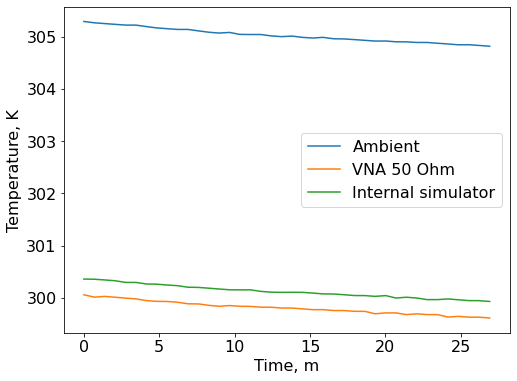

In [7]:
mins = model.spectra_temp[:, 5] + model.spectra_temp[:, 6] / 60.
mins -= mins[0]
ambient = model.spectra_temp[:, 8]
vna_50 = model.spectra_temp[:, 9]
ias = model.spectra_temp[:, 10]
eas = model.spectra_temp[:, 11]

fig = plt.figure(figsize=(8, 6))
plt.plot(mins, ambient, label='Ambient')
plt.plot(mins, vna_50, label='VNA 50 Ohm')
plt.plot(mins, ias, label='Internal simulator')
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r"Time, m", fontsize=16)
plt.ylabel(r"Temperature, K", fontsize=16)
plt.show()

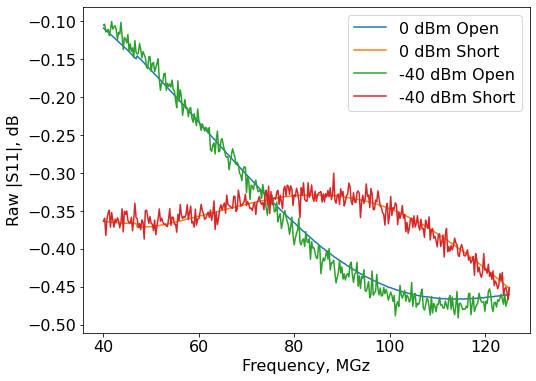

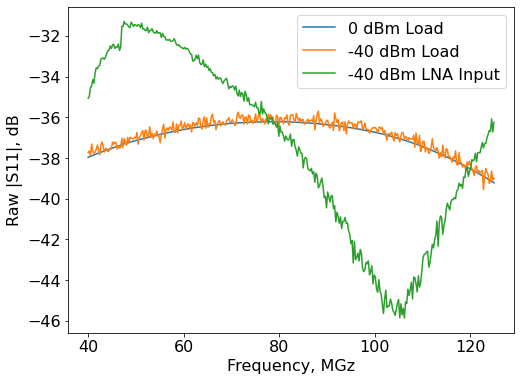

In [8]:
freq0 = np.abs(model.s11_0dBm[0, 8:])
open0 = 20. * np.log10(np.abs(model.s11_0dBm[1, 8:]))
short0 = 20. * np.log10(np.abs(model.s11_0dBm[2, 8:]))
load0 = 20. * np.log10(np.abs(model.s11_0dBm[3, 8:]))
receiver0 = 20. * np.log10(np.abs(model.s11_0dBm[4, 8:]))

freq40 = np.abs(model.s11_40dBm[0, 8:])
open40 = 20. * np.log10(np.abs(model.s11_40dBm[1, 8:]))
short40 = 20. * np.log10(np.abs(model.s11_40dBm[2, 8:]))
load40 = 20. * np.log10(np.abs(model.s11_40dBm[3, 8:]))
receiver40 = 20. * np.log10(np.abs(model.s11_40dBm[4, 8:]))

fig = plt.figure(figsize=(8, 6))
plt.plot(freq0, open0, label="0 dBm Open")
plt.plot(freq0, short0, label="0 dBm Short")
# plt.plot(freq0, receiver0, label="0 dBm Receiver Input")

plt.plot(freq40, open40, label="-40 dBm Open")
plt.plot(freq40, short40, label="-40 dBm Short")

plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel(r"Raw |S11|, dB", fontsize=16)
plt.xlabel(r"Frequency, MGz", fontsize=16)
plt.show()

fig = plt.figure(figsize=(8, 6))
plt.plot(freq0, load0, label="0 dBm Load")
plt.plot(freq0, load40, label="-40 dBm Load")
plt.plot(freq0, receiver40, label="-40 dBm LNA Input")
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel(r"Raw |S11|, dB", fontsize=16)
plt.xlabel(r"Frequency, MGz", fontsize=16)
plt.show()